## Classification
MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning: whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle MNIST. There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
print(mnist)

{'DESCR': 'mldata.org dataset: mnist-original', 'COL_NAMES': ['label', 'data'], 'target': array([0., 0., 0., ..., 9., 9., 9.]), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


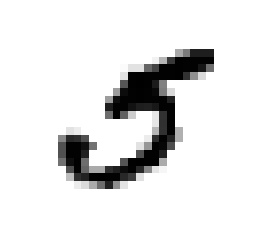

5.0


In [3]:
X, y = mnist["data"], mnist["target"]

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()
print(y[36000])

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
#shuffle the training set.
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


Binary classifier, capable of distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for this classification task

In [6]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


A good place to start is with a Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. This classifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning)


In [7]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 34 , max_iter= 100)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

array([ True])

A good way to evaluate a model is to use cross-validation. K-fold cross-validation means splitting the training set into K-folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folds.

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv= 3, scoring = "accuracy")

array([0.9414 , 0.86325, 0.96145])

Even the BaseEstimator will be more than 90% accurate on this dataset, This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time. This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others). A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.

In [9]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)
confusion_matrix(y_train_5, y_train_pred)

array([[50819,  3760],
       [  918,  4503]])

A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right):

In [10]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

Precision  = TP /(TP+FP) 
TP is True Positives and FP is False Positive. precision is typically used along with another metric named recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier.
Recall = TP/(TP+FN)
FN is False Negative i.e the instances which are positive but are predicted as negative by the classifier.

In [11]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.5449594578240349
0.8306585500830105


Now the 5-detector does not look as shiny as it did when you looked at its accuracy. When it claims an
image represents a 5, it is correct only 78%(precision) of the time. Moreover, it only detects 75% of the 5s(recall). It is often convenient to combine precision and recall into a single metric called the F 1 score, in
particular if you need a simple way to compare two classifiers. The F 1 score is the harmonic mean of
precision and recall. Whereas the regular mean treats all values equally, the harmonic
mean gives much more weight to low values. As a result, the classifier will only get a high F 1 score if
both recall and precision are high. Increasing precision reduces recall, and vice versa. This is
called the **precision/recall tradeoff**.

In [12]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.6581408944752996

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers.
It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC
curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the
ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true
negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR
is also called specificity. Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.
To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the
roc_curve() function